In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest

# Merging Data

In [18]:
income_file_names = ['U98_output.xlsx','U99_output.xlsx','U1400_output.xlsx','U1401_output.xlsx','R98_output.xlsx','R99_output.xlsx','R1400_output.xlsx','R1401_output.xlsx',]
cost_file_names = ['outcomeU98.xlsx','outcomeU99.xlsx','outcomeU1400.xlsx','outcomeU1401.xlsx','outcomeR98.xlsx','outcomeR99.xlsx','outcomeR1400.xlsx','outcomeR1401.xlsx',]

income_dfs=[]
for name in income_file_names:
  income_dfs.append(pd.read_excel(f'{name}'))

cost_dfs=[]
for name in cost_file_names:
  cost_dfs.append(pd.read_excel(f'{name}',usecols=['Address','Outcome']))

all_years_df = pd.read_excel('finall_v_income_cost.xlsx', usecols=['totall_income','totall_cost'])
all_years_df.rename(columns={'totall_income':'Incomes','totall_cost':'Costs'},inplace=True)
all_years_df.fillna(0,inplace=True)
all_years_df['Incomes'] = all_years_df['Incomes'].astype('int')

c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [19]:
each_year_dfs =[]
year = 1398
for i in range(4):
  temp = pd.merge(income_dfs[i],cost_dfs[i],on='Address',how='outer')
  temp.drop(columns='Address',inplace=True)
  temp.rename(columns={'lastincome':'Incomes','Outcome':'Costs'},inplace=True)
  temp.fillna(0,inplace=True)
  temp['Incomes'] = temp['Incomes'].astype('int')
  each_year_dfs.append((f'Urban {year}',temp))
  year += 1

year = 1398
for i in range(4,8):
  temp = pd.merge(income_dfs[i],cost_dfs[i],on='Address',how='outer')
  temp.drop(columns='Address',inplace=True)
  temp.rename(columns={'lastincome':'Incomes','Outcome':'Costs'},inplace=True)
  temp.fillna(0,inplace=True)
  temp['Incomes'] = temp['Incomes'].astype('int')
  each_year_dfs.append((f'Rural {year}',temp))
  year += 1

c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
c:\ProgramData\miniconda3\envs\querass\lib\site-packages\pandas\core\dtypes\cast.py:1196: Runti

In [20]:
each_year_dfs[0][1].head()

,Incomes,Costs
0,419300000,378876000
1,580380000,586716000
2,149460000,200904000
3,465840000,368616000
4,343920000,329844000


In [21]:
all_years_df.head()

,Incomes,Costs
0,419300000,152193000
1,580380000,198140288
2,907390000,243967000
3,149460000,43402000
4,654000000,314822000


## Handling Outliers

In [22]:
iso_for = IsolationForest(contamination=0.05,random_state=42)
new_dfs = []
for df in each_year_dfs:
  outliers = iso_for.fit_predict(df[1])
  print(np.unique(outliers , return_counts=True))
  df[1]['Is_Outlier'] = outliers
  dfn = df[1][df[1]['Is_Outlier'] == 1]
  dfn = dfn.drop(columns=['Is_Outlier'])
  new_dfs.append([df[0],dfn])

(array([-1,  1]), array([  995, 18903], dtype=int64))
(array([-1,  1]), array([  966, 18340], dtype=int64))
(array([-1,  1]), array([  981, 18637], dtype=int64))
(array([-1,  1]), array([  972, 18595], dtype=int64))
(array([-1,  1]), array([  922, 17508], dtype=int64))
(array([-1,  1]), array([  913, 17338], dtype=int64))
(array([-1,  1]), array([  919, 17451], dtype=int64))
(array([-1,  1]), array([  920, 17464], dtype=int64))


In [23]:
new_dfs[7][1] = new_dfs[7][1][new_dfs[7][1]['Incomes'] > -2e10]

In [26]:
outliers = iso_for.fit_predict(all_years_df)
print(np.unique(outliers , return_counts=True))
all_years_df['Is_Outlier'] = outliers
all_years_df_new = all_years_df[all_years_df['Is_Outlier'] == 1]
all_years_df_new = all_years_df_new.drop(columns=['Is_Outlier'])
all_years_df_new = all_years_df_new[all_years_df_new['Incomes'] > -2e9]

(array([-1,  1]), array([ 4786, 91412], dtype=int64))


# Q1 - Calculating Kmeans with 10 Clusters for Each Year and Zone

## Before Removing The Ouliers

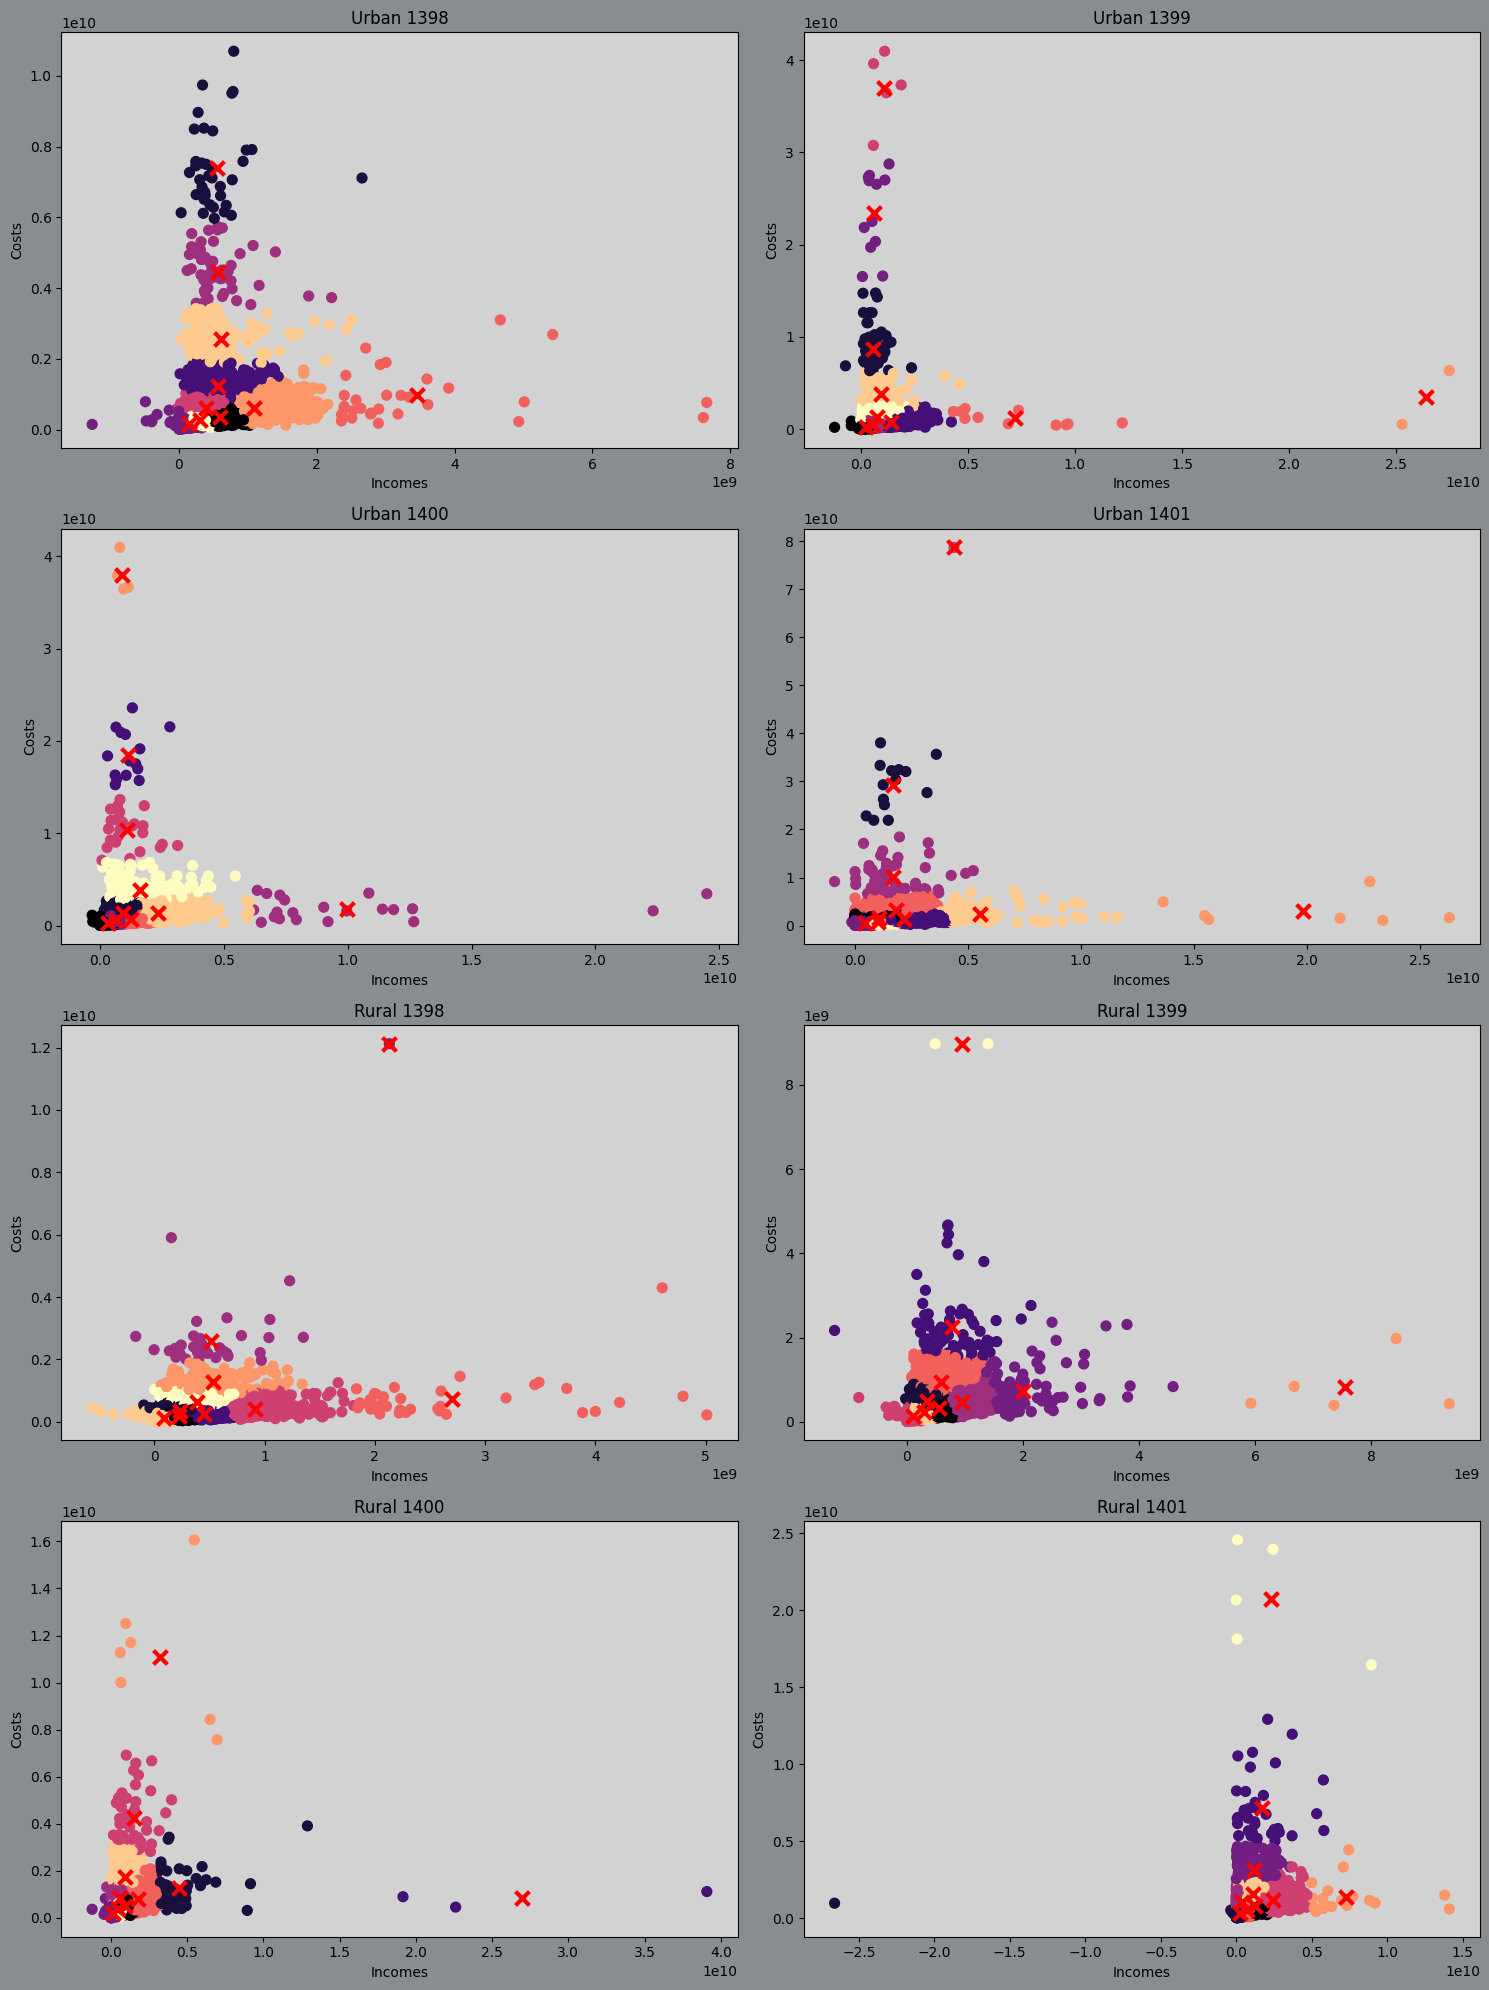

In [ ]:
fig , axes = plt.subplots(4,2 , figsize=(15,20))
kmean = KMeans(10, random_state=42, n_init='auto')
i = 0
for df in each_year_dfs:
  clusters = kmean.fit_predict(df[1])
  axes.flat[i].scatter(df[1]['Incomes'], df[1]['Costs'], c=clusters, cmap='magma',s = 50)
  axes.flat[i].scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='x', c = 'r',s=100, linewidths=3)
  axes.flat[i].set_xlabel('Incomes')
  axes.flat[i].set_ylabel('Costs')
  axes.flat[i].set_title(df[0])
  axes.flat[i].set_facecolor('#D2D2D2')
  fig.patch.set_facecolor('#8A8D90')

  i+=1
plt.tight_layout()
plt.show()

## After Removing The Outliers

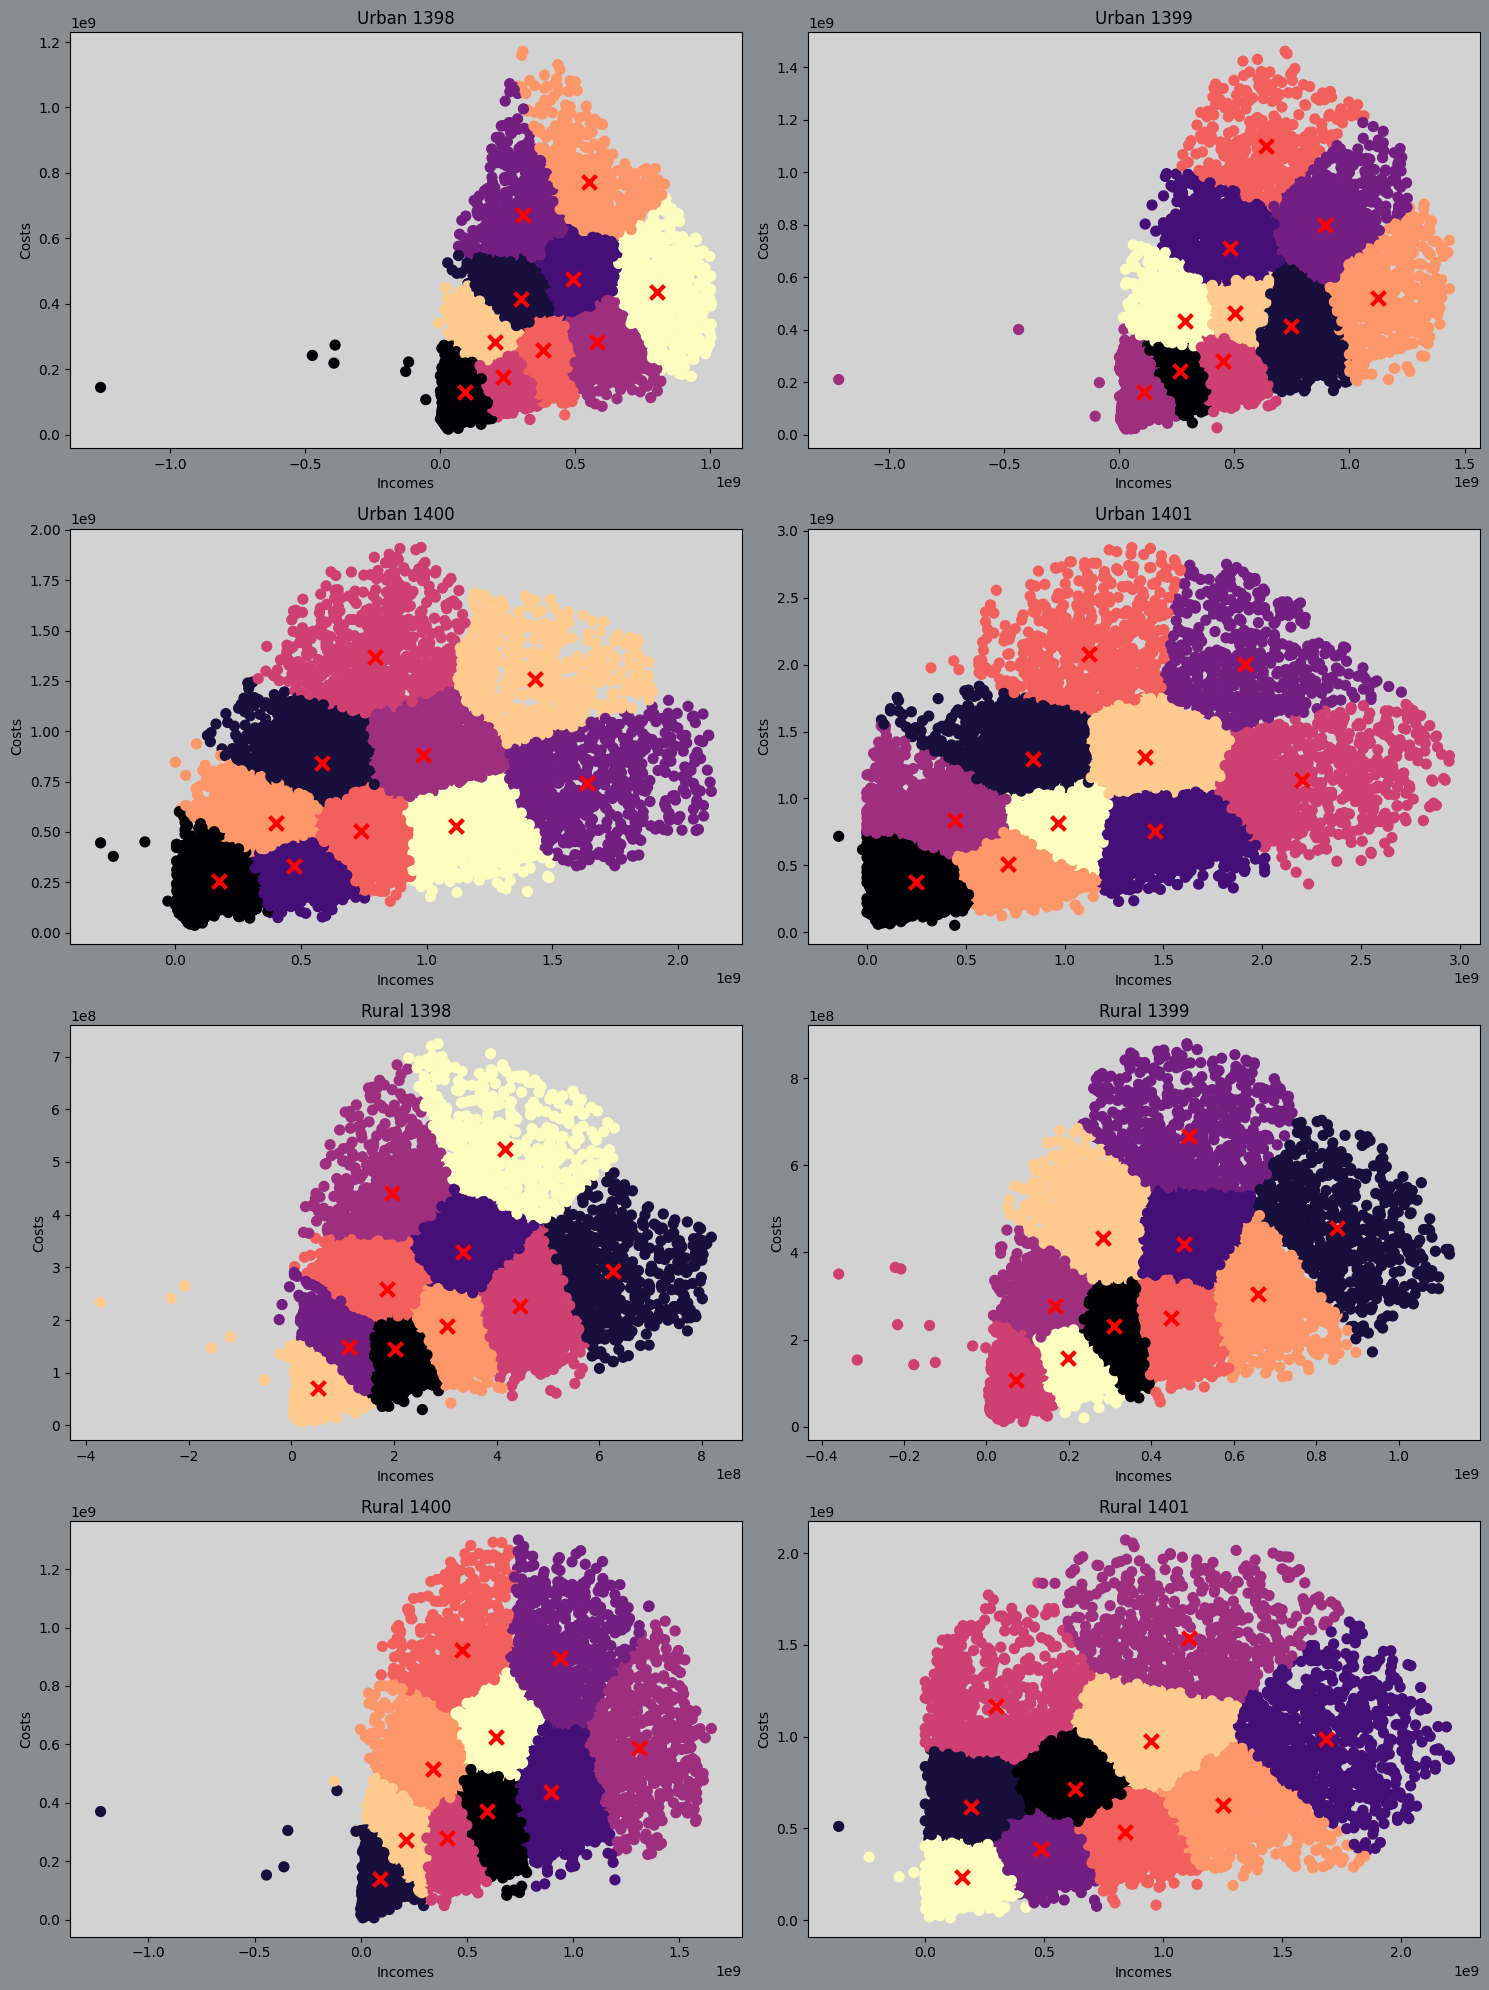

In [ ]:
fig , axes = plt.subplots(4,2 , figsize=(15,20))
kmean = KMeans(10,random_state=42,n_init='auto')
i = 0
for df in new_dfs:
  clusters = kmean.fit_predict(df[1])
  axes.flat[i].scatter(df[1]['Incomes'], df[1]['Costs'], c=clusters, cmap='magma',s = 50)
  axes.flat[i].scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='x', c = 'r',s=100, linewidths=3)
  axes.flat[i].set_xlabel('Incomes')
  axes.flat[i].set_ylabel('Costs')
  axes.flat[i].set_title(df[0])
  axes.flat[i].set_facecolor('#D2D2D2')
  fig.patch.set_facecolor('#8A8D90')

  i+=1
plt.tight_layout()
plt.show()

# Q1 - Calculating Kmeans with 10 Clusters for All Years Combined

## Before Removing Outliers

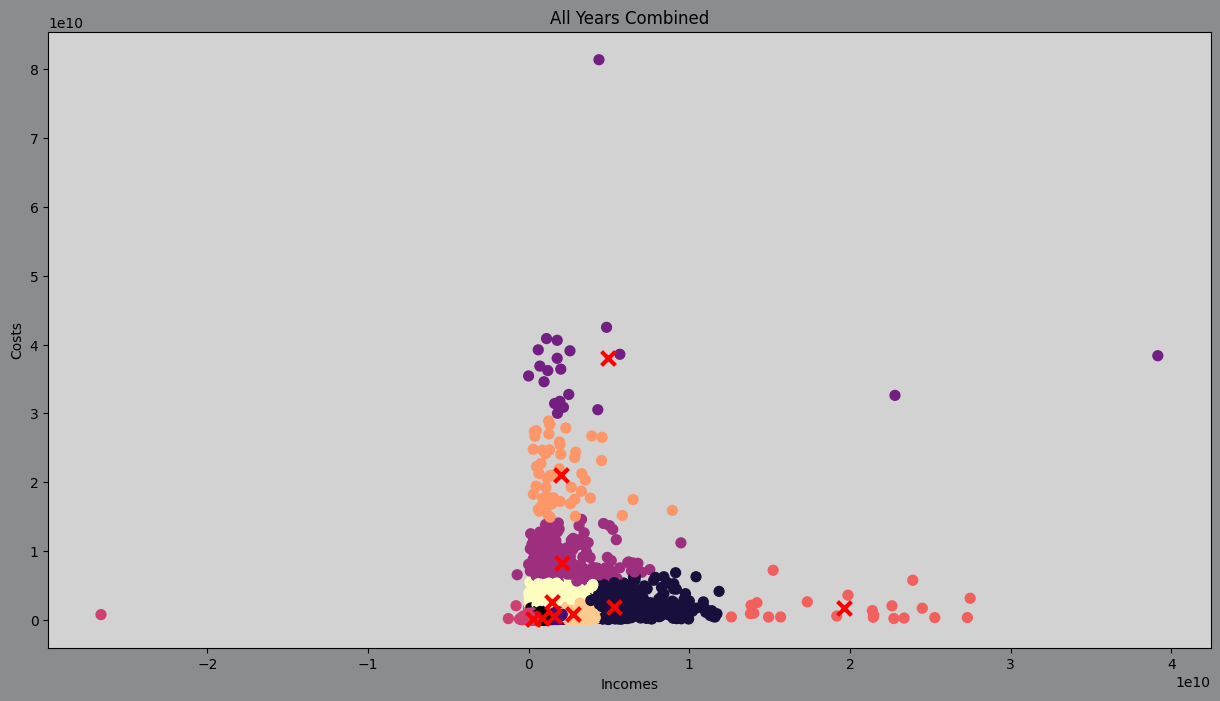

In [ ]:
fig , ax = plt.subplots(figsize=(15,8))
kmean = KMeans(10,random_state=42,n_init='auto')

clusters = kmean.fit_predict(all_years_df)
ax.scatter(all_years_df['Incomes'], all_years_df['Costs'], c=clusters, cmap='magma',s = 50)
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='x', c = 'r',s=100, linewidths=3)
ax.set_xlabel('Incomes')
ax.set_ylabel('Costs')
ax.set_title('All Years Combined')
ax.set_facecolor('#D2D2D2')
fig.patch.set_facecolor('#8A8D90')
plt.show()

## After Removing The Outliers

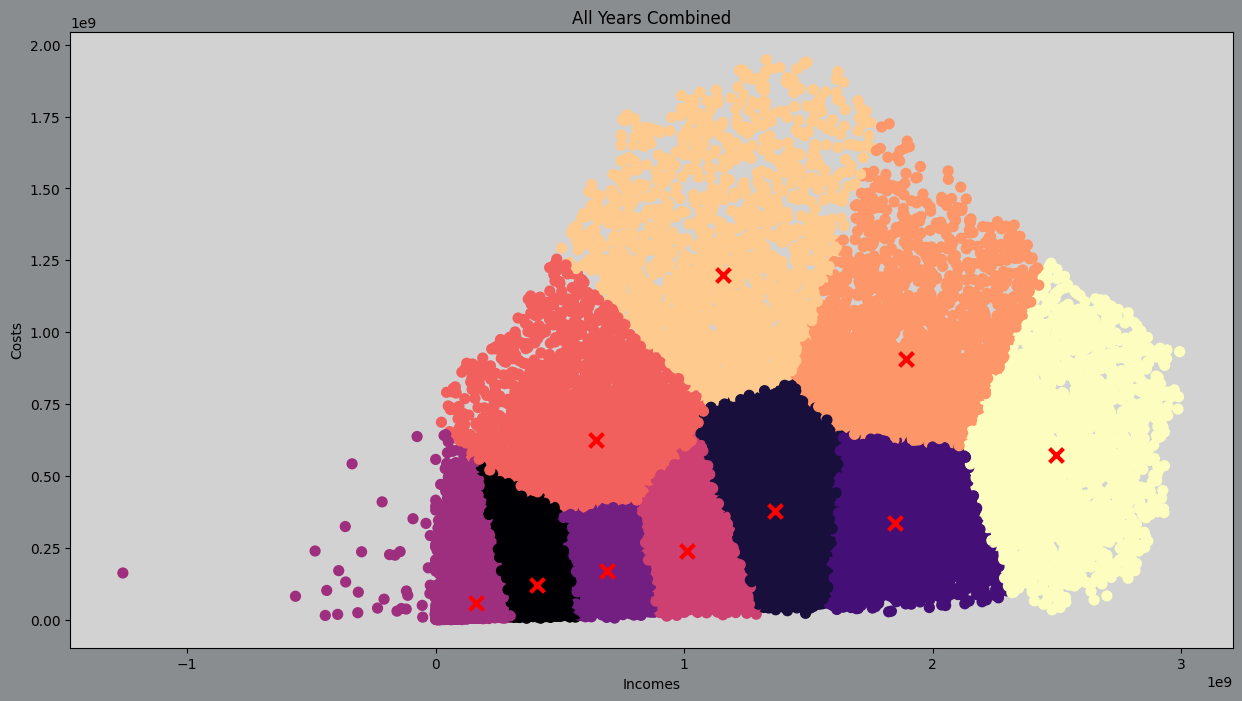

In [ ]:
fig , ax = plt.subplots(figsize=(15,8))
kmean = KMeans(10,random_state=42,n_init='auto')

clusters = kmean.fit_predict(all_years_df_new)
ax.scatter(all_years_df_new['Incomes'], all_years_df_new['Costs'], c=clusters, cmap='magma',s = 50)
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='x', c = 'r',s=100, linewidths=3)
ax.set_xlabel('Incomes')
ax.set_ylabel('Costs')
ax.set_title("All Years Combined")
ax.set_facecolor('#D2D2D2')
fig.patch.set_facecolor('#8A8D90')
plt.show()

# Q2 - Finding The Best K

##### We only use the last dataset to find the best K
##### All years combined and all outliers removed

In [ ]:
all_years_df_new.head()

,Incomes,Costs
0,419300000,152193000
1,580380000,198140288
2,907390000,243967000
3,149460000,43402000
4,654000000,314822000


In [ ]:
points = []
k_range = range(1,21)
for k in k_range:
    kmeans = KMeans(k,random_state=42, n_init='auto')
    kmeans.fit(all_years_df_new)
    points.append(kmeans.inertia_)

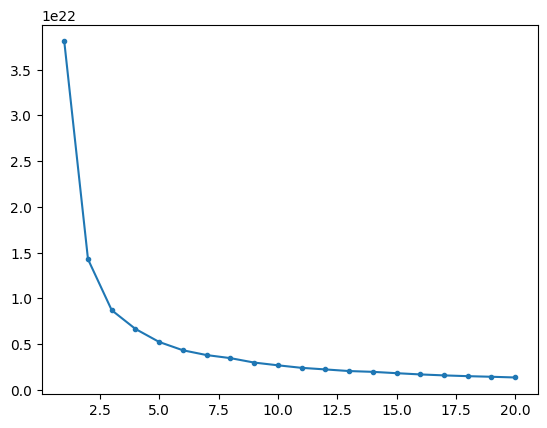

In [ ]:
plt.plot(k_range, points, marker='.')
plt.show()

There is no interesting point based on this plot o we have to use another evaluation method to find a K to serve our purposes.

The points [ 2 , 3 ] maybe a little good.

In [ ]:
scores = []
for k in k_range[1:]:
  kmeans = KMeans(k,random_state=42, n_init='auto')
  kmeans.fit(all_years_df_new)
  scores.append(silhouette_score(all_years_df_new, kmeans.labels_))

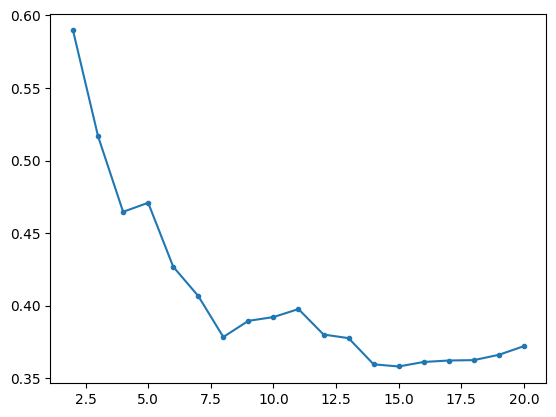

In [ ]:
plt.plot(k_range[1:], scores, marker='.')
plt.show()

Based on this plot possible Ks to serve our purposes can be [2, 3, 4, 5, 6, 7, 11]

Maybe we need other methods to find our best K

### Davies-Bouldin Score

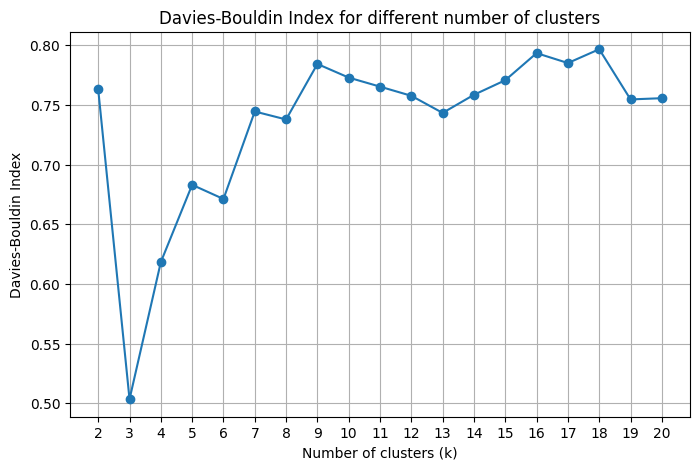

In [13]:
from sklearn.metrics import davies_bouldin_score

# Function to calculate the Davies-Bouldin Index for different clusters
def calculate_db_index(data, max_k=10):
    db_indices = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
        kmeans.fit(data)
        labels = kmeans.labels_
        db_index = davies_bouldin_score(data, labels)
        db_indices.append(db_index)
    return db_indices

# Calculate Davies-Bouldin Index
max_clusters = 20
db_indices = calculate_db_index(all_years_df_new, max_k=max_clusters)

# Plotting the Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), db_indices, marker='o')
plt.title('Davies-Bouldin Index for different number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, max_clusters + 1))
plt.grid()
plt.show()

The point [3] is the best by this method of evaluating but the point [4,5,6,7,8,13] are also considerable

### Calinski-Harabasz Score

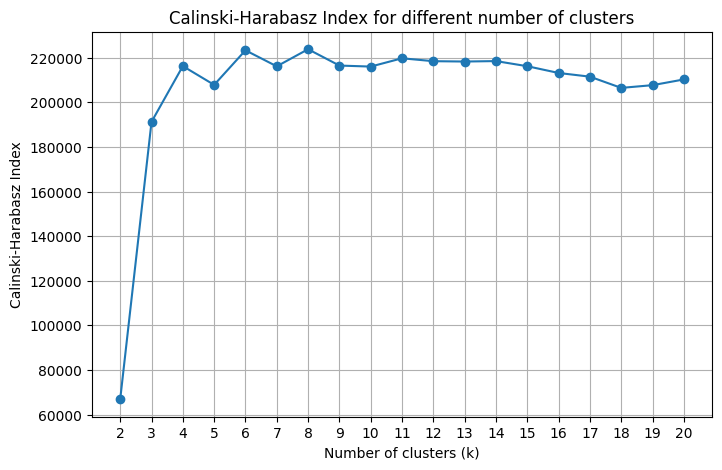

In [14]:
from sklearn.metrics import calinski_harabasz_score


# Function to calculate the Calinski-Harabasz Index for different clusters
def calculate_ch_index(data, max_k=10):
    ch_indices = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
        kmeans.fit(data)
        labels = kmeans.labels_
        ch_index = calinski_harabasz_score(data, labels)
        ch_indices.append(ch_index)
    return ch_indices

# Calculate Calinski-Harabasz Index
max_clusters = 20
ch_indices = calculate_ch_index(all_years_df_new, max_k=max_clusters)

# Plotting the Calinski-Harabasz Index
plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), ch_indices, marker='o')
plt.title('Calinski-Harabasz Index for different number of clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.xticks(range(2, max_clusters + 1))
plt.grid()
plt.show()

by this method of evaluating the points [6,8,11] are the best.

In conclusion of all metrics the best value for could be [8]

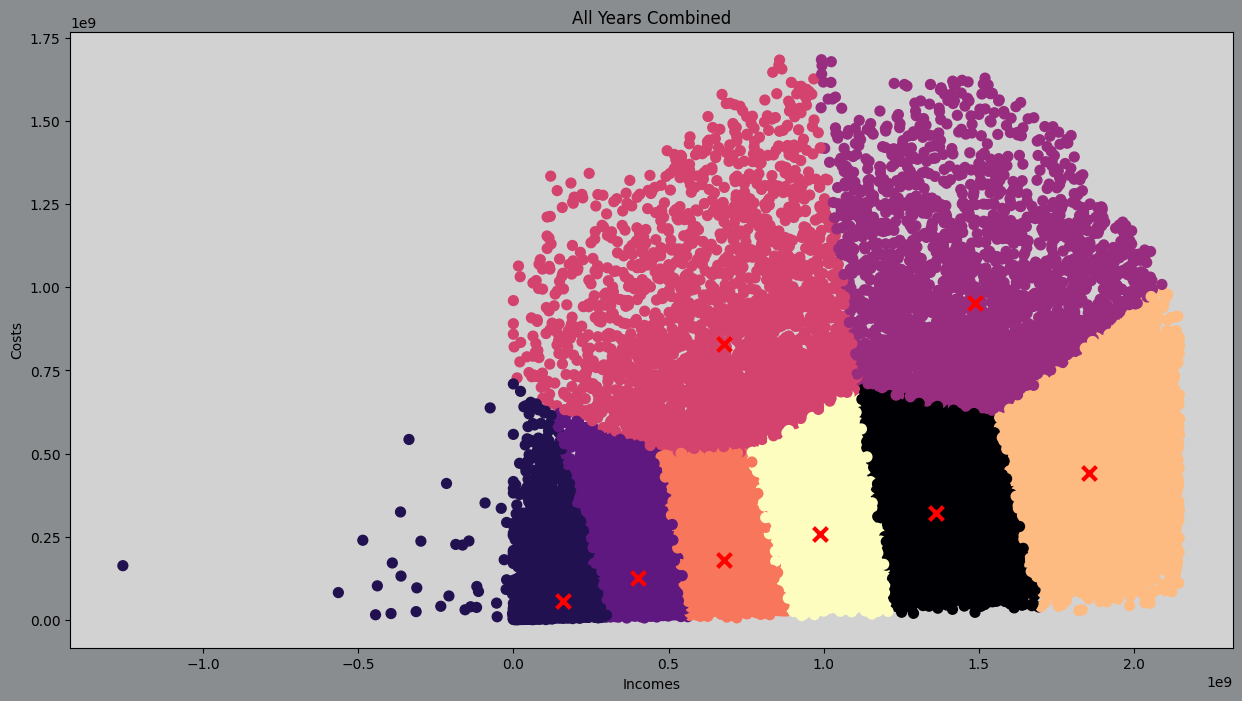

In [27]:
fig , ax = plt.subplots(figsize=(15,8))
kmean = KMeans(8,random_state=42,n_init='auto')

clusters = kmean.fit_predict(all_years_df_new)
ax.scatter(all_years_df_new['Incomes'], all_years_df_new['Costs'], c=clusters, cmap='magma',s = 50)
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='x', c = 'r',s=100, linewidths=3)
ax.set_xlabel('Incomes')
ax.set_ylabel('Costs')
ax.set_title("All Years Combined")
ax.set_facecolor('#D2D2D2')
fig.patch.set_facecolor('#8A8D90')
plt.show()